# Mall Customer Segmentation

## Problem Statement:

You own the mall and want to understand the customers like who can be easily converge (Target customers) so that the sense can be given to marketing team and plan the strategy accordingly.

## Description Variables:
* **CustomerID**:             Unique ID assigned to the customer
* **Gender**:                 Gender of the customer
* **Age**:                    Age of the customer
* **Annual Income (k$)**:     Annual Income of the customee
* **Spending Score (1–100)**: Score assigned by the mall based on customer behavior and spending nature.

## Steps:
* Importing Libraries
* Importing Data
* Data Visualization
* Clustering using K-Means
* Selection of Clusters
* Plotting the Cluster Boundary and Clusters
* Visualization of Cluster Result

## Definition:

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. In the realm of machine learning, k-means clustering can be used to segment customers (or other data) efficiently.


## Properties of Clusters:

1. All the data points in a cluster should be similar to each other. 
2. The data points from different clusters should be as different as possible. 

## The approach Kmeans follows to solve the problem is called Expectation Maximization:

1. Specify number of clusters K.
2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without       replacement.
3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
4. Compute the sum of the squared distance between data points and all centroids.
5. Assign each data point to the closest cluster (centroid).
6. Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

## Stopping Criteria for K-Means Clustering

There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

* Centroids of newly formed clusters do not change
* Points remain in the same cluster
* Maximum number of iterations are reached

## When to use Cluster Analysis?

If we are using a labeled data we can use classification technique whereas in case when the data is not labeled we can cluster the data based on certain feature and try to label it on our own.So when we use cluster analysis we don’t have labels(ie..data is not labeled)in the context of machine learning this is called as unsupervised learning.

## Final Goal:
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.

## Step 1: Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [ ]:
data = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
#Let's see how our data looks like!

data.head(5)

In [ ]:
# Let's get some more information about our dataset.

data.info()

In [ ]:
import missingno as mn
mn.matrix(data)

### There are no missing values in our dataset

## Plotting the data:
Now we will simply plot the scatter plot of the given data using. 

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=data, s=30, color="red", alpha = 0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

We can see the behaviour of Customers with Annual Income and their Spending Score. 
The plot shows segments of Customers with following behaviours :

* Less Income- Less Spending Score
* High Income- Less Spending Score
* Low Income- High Spending Score
* High Income- High Spending Score
* Moderate Income- Moderate Spending Score

## Rescaling

In [ ]:
x= data.iloc[:,3:5]

x_array =  np.array(x)
print(x_array)

In [ ]:
scaler = StandardScaler() 

x_scaled = scaler.fit_transform(x_array)
x_scaled

## Determine K-value

### 1)  Elbow-Method using WCSS(Within Cluster Sum of Squares):
 
The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let's say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center.

In [ ]:
# Fitting the model for values in range(1,11)

SSD =[]
K = range(1,11)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(x_scaled)
    SSD.append(km.inertia_)

### Inertia: It is defined as the mean squared distance between each instance and its closest centroid. Logically, as per the definition lower the inertia better the model.

In [ ]:
#plotting Elbow
plt.figure(figsize=(8,5))
plt.plot(K, SSD, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

### Now if we observe the point after which there isn’t a sudden change in WCSS in K=5. So we will choose K=5 as an appropriate number of clusters which matched the clusters we had before applying the algorithm.

## 2) Silhouette Coefficient Method:

The silhouette coefficient of a data measures how well data are assigned to its own cluster and how far they are from other clusters. 
* A silhouette close to 1 means the data points are in an appropriate cluster 
* A silhouette coefficient close to −1 implies out data is in the wrong cluster.

**Silhouette Coefficient = (x-y)/ max(x,y)**

In [ ]:
KMean= KMeans(n_clusters=5)
KMean.fit(x_scaled)
label=KMean.predict(x_scaled)

print("Silhouette Score(n=5):",silhouette_score(x_scaled, label))

In [ ]:
model = KMeans(random_state=123)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
Visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
plt.figure(figsize=(8,5))
# Fit the data and visualize
Visualizer.fit(x_scaled)    
Visualizer.poof()

## For more read on KElbowVisualizer:

https://heartbeat.fritz.ai/analyzing-machine-learning-models-with-yellowbrick-37795733f3ee

In [ ]:
print(KMean.cluster_centers_)

In [ ]:
print(KMean.labels_)

### Our labels are from 0-4.

In [ ]:
#Add cluster results columns to the dataset dataframe

data["cluster"] = KMean.labels_
data.head()

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(x_scaled[label==0, 0], x_scaled[label==0, 1], s=100, c='red', label ='Careless')
plt.scatter(x_scaled[label==1, 0], x_scaled[label==1, 1], s=100, c='blue', label ='Target')
plt.scatter(x_scaled[label==2, 0], x_scaled[label==2, 1], s=100, c='green', label ='Planner')
plt.scatter(x_scaled[label==3, 0], x_scaled[label==3, 1], s=100, c='cyan', label ='Sensible')
plt.scatter(x_scaled[label==4, 0], x_scaled[label==4, 1], s=100, c='magenta', label ='Moderate')

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show

## Closing comments: 

Now we know customers behaviour depending upon their Annual Income and Spending Score. 
There can be many marketing strategies applied for Customers on these Cluster Analysis.
High income and High spending score customers are our target customers and we would always want to retain them as they give the most profit margin.
High Income and Less spending score customers can be attracted with wide range of products their life style demands and it might attract them towards the Mall Supermarket.
Less Income Less Spending Score can be given extra offers and constantly sending them the offers and discounts will attract them towards spending.We can also have a cluster anaysis done on what kind of products customers tend to buy and can make other marketing strategies accordingly.

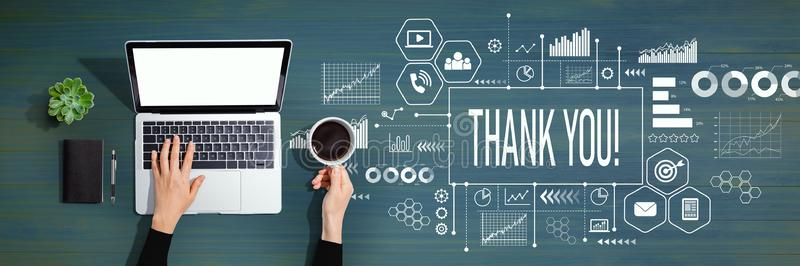